In [62]:
%pip install tensorflow==2.0.0

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow==2.0.0 (from versions: 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0)
ERROR: No matching distribution found for tensorflow==2.0.0


In [63]:
%pip install keras

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D #Dropout, BatchNormalization
import cv2
import joblib

import numpy as np
import matplotlib.pyplot as plt

# Split the data into training and testing

In [3]:
import os
import shutil
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Define paths
dataset_dir = "C:/Users/supre/Desktop/projects/capstone/ModelBuilding/Converted_dataset"
output_dir = "splitted_dataset"  # Folder to store training/testing splits
categories = ["normal", "potholes"]

# Create output directories
for subset in ["train", "test"]:
    for category in categories:
        os.makedirs(os.path.join(output_dir, subset, category), exist_ok=True)

# Split and copy files, handling only valid image files
valid_extensions = (".jpeg","png",".bmp")
for category in categories:
    category_path = os.path.join(dataset_dir, category)
    images = [f for f in os.listdir(category_path) if f.lower().endswith(valid_extensions)]
    
    # Split the images into train (80%) and test (20%)
    train_files, test_files = train_test_split(images, test_size=0.2, random_state=12)
    
    # Copy images to respective folders
    for file in train_files:
        shutil.copy(os.path.join(category_path, file), os.path.join(output_dir, "train", category))
    for file in test_files:
        shutil.copy(os.path.join(category_path, file), os.path.join(output_dir, "test", category))

# Load the training dataset
train_dataset = image_dataset_from_directory(
    directory=output_dir + "/train",
    labels='inferred',
    label_mode='int',
    image_size=(256, 256),
    batch_size=32
)

# Load the test dataset
test_dataset = image_dataset_from_directory(
    directory=output_dir + "/test",
    labels='inferred',
    label_mode='int',
    image_size=(256, 256),
    batch_size=32
)

# Print the class names
class_names = train_dataset.class_names
print(class_names)

Found 544 files belonging to 2 classes.
Found 137 files belonging to 2 classes.
['normal', 'potholes']


In [66]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
    directory='splitted_dataset/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
)
test_ds = keras.utils.image_dataset_from_directory(
    directory='splitted_dataset/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
)

Found 544 files belonging to 2 classes.
Found 137 files belonging to 2 classes.


In [67]:
#normalize the dataset
def process(image,label):
    image =tf.cast(image/255. , tf.float32)
    return image, label
#applying the process function to the dataset
train_ds = train_ds.map(process) # creating the pixels values between 0 and 1 and save them in their respective dataset
test_ds = test_ds.map(process)

# Building the Model

In [68]:
# model
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
# model.add(BatchNormalization())
# add pooling layer
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

c:\Users\supre\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [69]:
#summary of the model
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [70]:
#compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [71]:
model.fit(train_ds, validation_data=test_ds, epochs=25)

Epoch 1/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.5415 - loss: 0.9295 - val_accuracy: 0.7153 - val_loss: 0.5195
Epoch 2/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.8003 - loss: 0.3971 - val_accuracy: 0.8905 - val_loss: 0.2670
Epoch 3/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.9067 - loss: 0.2293 - val_accuracy: 0.8832 - val_loss: 0.2576
Epoch 4/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.9187 - loss: 0.1970 - val_accuracy: 0.9270 - val_loss: 0.1935
Epoch 5/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9372 - loss: 0.1454 - val_accuracy: 0.9197 - val_loss: 0.2169
Epoch 6/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.9597 - loss: 0.1163 - val_accuracy: 0.8905 - val_loss: 0.2720
Epoch 7/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9659 - loss: 0.1051 - val_accuracy: 0.9051 - val_loss: 0.2193
Epoch 8/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.9877 - loss: 0.0522 - val_accuracy: 0.9124 - val_loss:

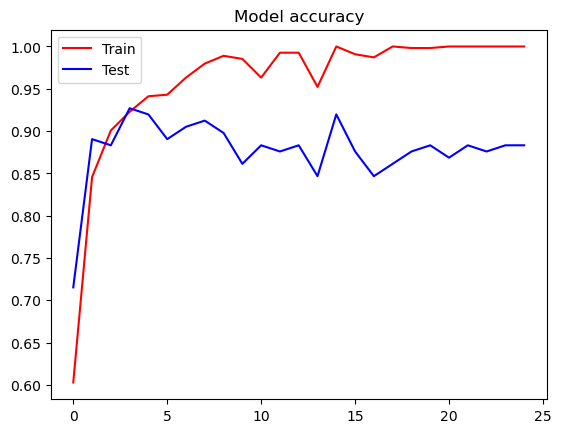

In [72]:
#plotting
plt.plot(model.history.history['accuracy'],color='red',label='Train')
plt.plot(model.history.history['val_accuracy'],color='blue',label='Test')
plt.title('Model accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

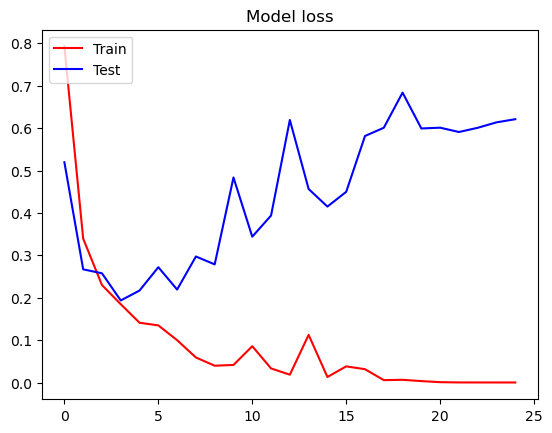

In [73]:
#plotting loss
plt.plot(model.history.history['loss'],color='red',label='Train')
plt.plot(model.history.history['val_loss'],color='blue',label='Test')
plt.title('Model loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [100]:
#save the model
joblib.dump(model, 'model.joblib')

['model.joblib']

In [ ]:
%pip install opencv-python

   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   - -------------------------------------- 1.3/39.5 MB 11.3 MB/s eta 0:00:04
   --- ------------------------------------ 3.4/39.5 MB 14.4 MB/s eta 0:00:03
   ------- -------------------------------- 7.6/39.5 MB 14.7 MB/s eta 0:00:03
   ------------ --------------------------- 12.1/39.5 MB 15.7 MB/s eta 0:00:02
   ---------------- ----------------------- 16.0/39.5 MB 16.2 MB/s eta 0:00:02
   ------------------- -------------------- 19.7/39.5 MB 16.6 MB/s eta 0:00:02
   ----------------------- ---------------- 23.3/39.5 MB 16.8 MB/s eta 0:00:01
   --------------------------- ------------ 26.7/39.5 MB 16.6 MB/s eta 0:00:01
   ------------------------------ --------- 30.4/39.5 MB 16.5 MB/s eta 0:00:01
   ---------------------------------- ----- 33.8/39.5 MB 16.5 MB/s eta 0:00:01
   ------------------------------------- -- 37.5/39.5 MB 16.5 MB/s eta 0:00:01
   ---------------------------------------  39.3/39.5 MB 16.6 MB

In [79]:
test_img =cv2.imread('road.jpeg')

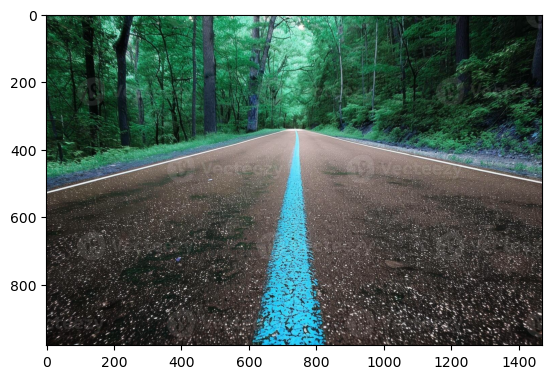

In [80]:
plt.imshow(test_img)

In [89]:
# Function to load and preprocess the image
def load_and_preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert BGR to RGB
    img_resized = cv2.resize(img, (256, 256))
    img_normalized = img_resized / 255.0
    img_expanded = np.expand_dims(img_normalized, axis=0) # Expand dimensions to match the input shape of the model
    return img_expanded, img

# Function to make predictions
def predict_image(image_path, model):
    img_preprocessed, img_original = load_and_preprocess_image(image_path)
    
    # Make predictions
    prediction = model.predict(img_preprocessed)

    #label of the image
    class_label = 'pothole' if prediction[0] > 0.5 else 'normal'
    
    # Display the image and prediction
    plt.imshow(img_original)
    plt.title(f'Prediction: {class_label}')
    plt.axis('off')
    plt.show()
    return class_label

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


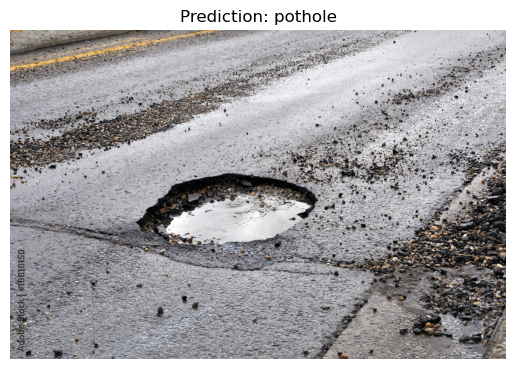

'pothole'

In [98]:
#predection and given path
image_path = 'pothole.jpeg' 
predict_image(image_path, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


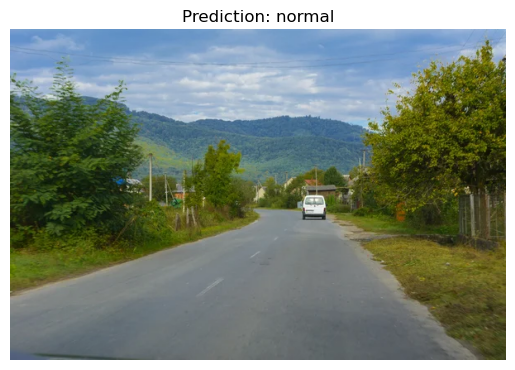

'normal'

In [95]:
image_path = '3.jpg' 
predict_image(image_path, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


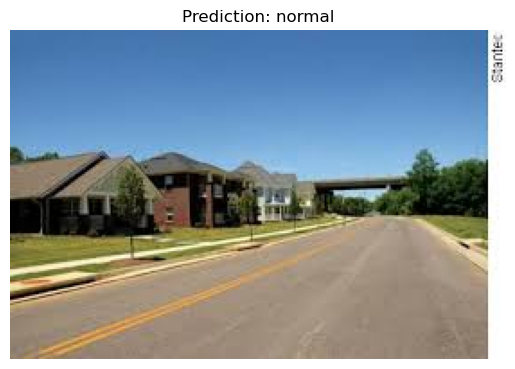

'normal'

In [96]:
image_path = '4.jpg' 
predict_image(image_path, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


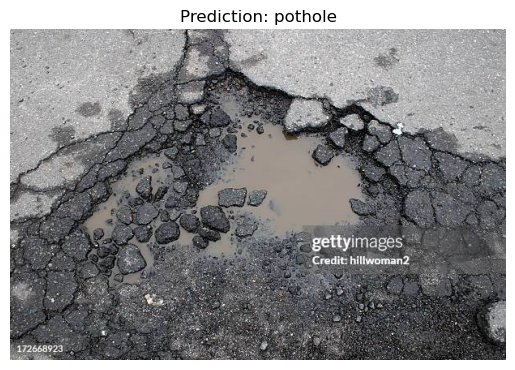

'pothole'

In [97]:
image_path = '2.jpg' 
predict_image(image_path, model)

FileUpload(value={}, accept='image/*', description='Upload', multiple=True)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


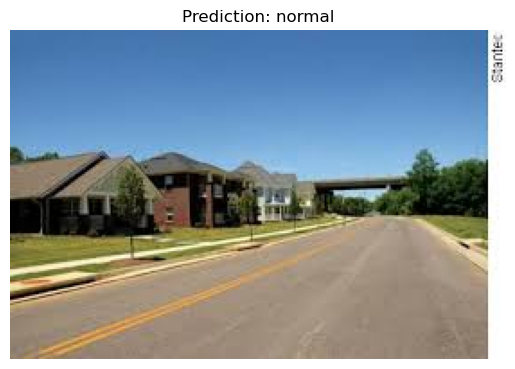

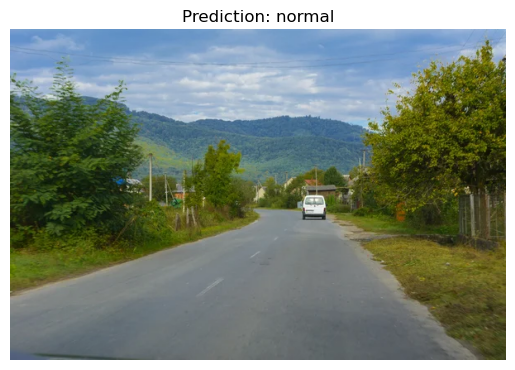

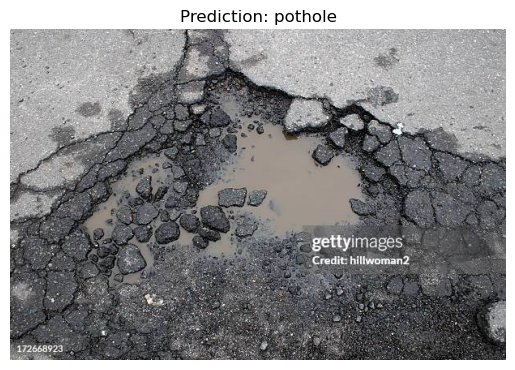

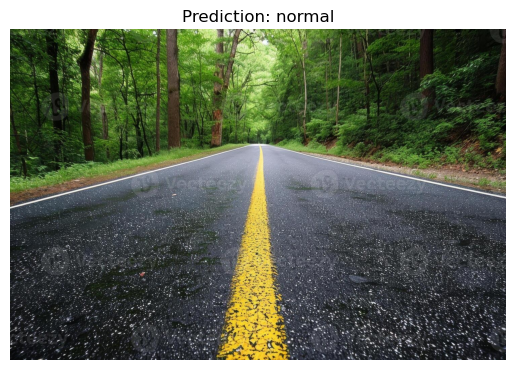

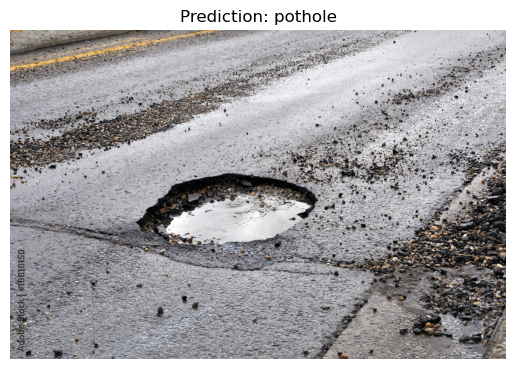

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


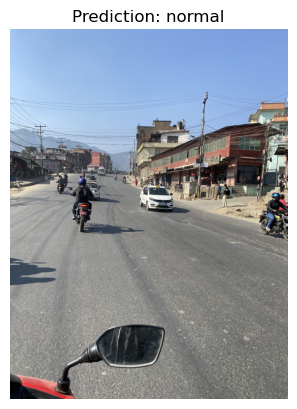

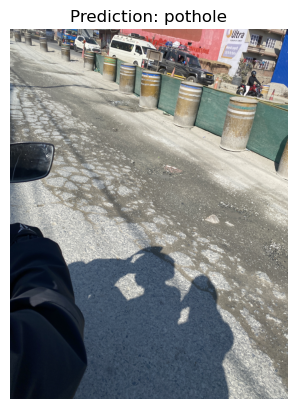

In [2]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
import joblib
import os
import ipywidgets as widgets
from IPython.display import display

# Function to load and preprocess a single image
def load_and_preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img, (256, 256))
    img_normalized = img_resized / 255.0
    img_expanded = np.expand_dims(img_normalized, axis=0)
    return img_expanded, img

# Function to load and preprocess multiple images
def load_and_preprocess_images(image_paths):
    preprocessed_images = []
    original_images = []
    for image_path in image_paths:
        img_preprocessed, img_original = load_and_preprocess_image(image_path)
        preprocessed_images.append(img_preprocessed)
        original_images.append(img_original)
    preprocessed_images_batch = np.vstack(preprocessed_images)
    return preprocessed_images_batch, original_images

# Function to make predictions on multiple images
def predict_images(image_paths, model):
    preprocessed_images, original_images = load_and_preprocess_images(image_paths)
    predictions = model.predict(preprocessed_images)
    class_labels = ['pothole' if pred > 0.5 else 'normal' for pred in predictions]
    for img, label in zip(original_images, class_labels):
        plt.imshow(img)
        plt.title(f'Prediction: {label}')
        plt.axis('off')
        plt.show()
    return class_labels

# Function to handle file upload
def on_upload_change(change):
    uploaded_files = change['new']
    temp_dir = 'temp_uploaded_images'
    os.makedirs(temp_dir, exist_ok=True)
    image_paths = []
    for name, file_info in uploaded_files.items():
        file_path = os.path.join(temp_dir, name)
        with open(file_path, 'wb') as f:
            f.write(file_info['content'])
        image_paths.append(file_path)
    predict_images(image_paths, loaded_model)

# Function to create and display the file upload widget
def create_upload_widget(model_path):
    global loaded_model
    loaded_model = joblib.load(model_path)
    upload_widget = widgets.FileUpload(accept='image/*', multiple=True)
    upload_widget.observe(on_upload_change, names='value')
    display(upload_widget)

# Example usage
model_path = 'model.joblib'  # Replace with the path to your saved model file
create_upload_widget(model_path)